In [45]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk
import numpy as np

%reload_ext autoreload
%autoreload 2

In [52]:
data = mogptk.Data()

data.add_function(lambda x: np.sin(6*x), n=20, start=0.0, end=4.0, var=0.03, name='A')
#data.add_function(lambda x: np.sin(6*x)+2, n=20, start=0.0, end=4.0, var=0.03, name='B')
#data.add_function(lambda x: np.sin(6*x)+2 - np.sin(4*x), n=20, start=0.0, end=4.0, var=0.03, name='C')

data.remove_range('A', start=2.0, end=None)

In [76]:
model = mogptk.SM(data, Q=3)
display(model.get_params())

[{'mixture_weights': array([0.21593113, 0.21593113, 0.21593113]),
  'mixture_scales': array([[15.5120072 ,  0.41711469,  0.95886772]]),
  'mixture_means': array([[0.        ],
         [0.46703521],
         [0.64425509]])}]

In [77]:
model.train()
display(model.get_params())

Building...


Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: -11.219854
  Number of iterations: 80
  Number of functions evaluations: 121
Done


[{'mixture_weights': array([8.25355691e-04, 5.25430505e-01, 1.00000000e-06]),
  'mixture_scales': array([[3.30480757e+00, 1.00000000e-06, 1.00000000e-06]]),
  'mixture_means': array([[1.00000000e-06],
         [9.49872069e-01],
         [9.20992087e-01]])}]

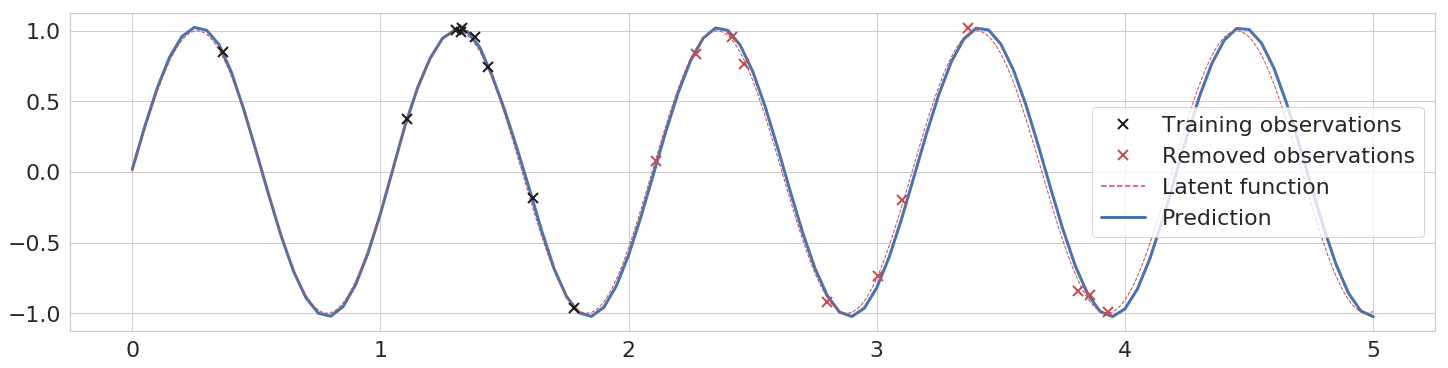

In [78]:
model.set_prediction_range(0, 0.0, 5.0, 0.05)
model.predict()
mogptk.plot(model)